<div style="padding: 35px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/7078619/pexels-photo-7078619.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:black'><strong>EABL STOCK PRICE PREDICTION </strong></span></b> </div> 

### <b> <span style='color:#16C2D5'>|</span> Business Objectives</b>
1. Build a robust time series model leveraging market indicators to forecast future EABL stock prices. 
2. Investigate viability of investing in EABL stock prices. 
3. Build an anomally detection system to identify unusual or unexpected patterns in EABL stock prices. 

In [1]:
import pandas as pd 
import numpy as np
 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA

#### DATA NDERSTANDING
1. Load and inspect the data

   Check the structure and completeness of the dataset.

2. Data preprocessing 

   Handle missing values, convert data types if necessary, and set the date column as the index for time series analysis.

3. Volatility Insights

   Investigate and model the volatility of EABL stock prices over time.

4. Abnormal Trade Volume Analysis

   Identify and analyze spikes or drops in trade volumes.

5. Dividend Analysis

   Examine the trend in dividend payouts.

6. Time Series Decomposition

   Decompose  time series into trends,seasonal and residual components to better understand the underlying patterns.

7. Lag Analysis

   Investigate the effects of market indicators on EABL stock prices whether their impact have a time lag 

8. Stock Valuation

   Investigate how stock prices vary with quarterly  unemployment rates.

In [2]:
# Loading and Previewing the datasets
merged_data = pd.read_csv('Data/final_merge.csv')

print("\nColumns and First 5 Rows in Merged Data:")
print(merged_data.head())



Columns and First 5 Rows in Merged Data:
   Unnamed: 0       Date    Open    High  Low  Close Average  Volume Month  \
0         0.0  1/31/2024     104     111  104    110     106   42000     1   
1         1.0  1/30/2024     105     105  101    104     104   15600     1   
2         2.0  1/29/2024     105     105   99  103.5     100  596100     1   
3         3.0  1/26/2024  116.25  116.25  100    100   104.5   60500     1   
4         4.0  1/25/2024  119.75     120  118    118  118.25    5700     1   

   Year Day Annual Average Inflation 12-Month Inflation Mean Amount  \
0  2024  31                      NaN                6.9  161      1   
1  2024  30                      NaN                6.9  161      1   
2  2024  29                      NaN                6.9  162      1   
3  2024  26                      NaN                6.9  162      1   
4  2024  25                      NaN                6.9  163   1.75   

  Dividends per share Earnings Per Share  
0                  

In [3]:
# Checking for missing values in the final_merge.csv
# Check for missing values
print("\nMissing Values:")
print(merged_data.isnull().sum())



Missing Values:
Unnamed: 0                    1
Date                          0
Open                          0
High                          0
Low                           0
Close                         0
Average                       0
Volume                        0
Month                         0
Year                          0
Day                           0
Annual Average Inflation     42
12-Month Inflation            0
Mean                         24
Amount                      224
Dividends per share           0
Earnings Per Share           42
dtype: int64


The dataset exhibits some missing values in key columns. The 'Annual Average Inflation' column has 21 missing entries, suggesting that information regarding the average annual inflation rate for those specific periods is unavailable. Additionally, the 'Mean' column has 12 missing values, indicating a lack of mean exchange rates for those corresponding dates. Furthermore, the 'Amount' column shows 112 missing values, implying that the exact monetary amount associated with certain transactions or financial events is not recorded. Lastly, the 'Earnings Per Share' column has 21 missing values, suggesting that earnings per share information is absent for some instances.

In [4]:
# Handling Missing Values
# Dropping rows with missing values.
merged_data = merged_data.dropna()

# Convert Date Column to Datetime
merged_data['Date'] = pd.to_datetime(merged_data['Date'])

# Remove Unnecessary Columns
# Identify columns that are not needed for the analysis and drop them.
columns_to_drop = ['Unnamed: 0', 'Amount', 'Dividends per share', 'Earnings Per Share']
merged_data = merged_data.drop(columns=columns_to_drop)

# Display the cleaned dataset
print("Cleaned Merged Data:")
print(merged_data.head())

Cleaned Merged Data:
         Date   Open High  Low Close Average  Volume Month  Year Day  \
21 2023-12-29    114  114  114   114     114    1100    12  2023  29   
22 2023-12-28    115  115  113   115  114.25    1500    12  2023  28   
23 2023-12-27    114  118  114   118     115    1100    12  2023  27   
24 2023-12-22    114  114  114   114     114    1000    12  2023  22   
25 2023-12-21  108.5  110  108   110     108  305500    12  2023  21   

   Annual Average Inflation 12-Month Inflation      Mean  
21                     7.67               6.63  156.4618  
22                     7.67               6.63  156.0941  
23                     7.67               6.63  155.4706  
24                     7.67               6.63  155.0853  
25                     7.67               6.63  154.6853  


In [5]:
# Convert 'Date' column to datetime format
merged_data['Date'] = pd.to_datetime(merged_data['Date'])

### Feature Engineering

In [6]:
# Extract days, months, and years from the 'Date' column
merged_data['Day_of_Week'] = merged_data['Date'].dt.dayofweek
merged_data['Month'] = merged_data['Date'].dt.month
merged_data['Quarter'] = merged_data['Date'].dt.quarter
merged_data['Year'] = merged_data['Date'].dt.year

# Display the updated dataset info
print("Updated Dataset Info:")
print(merged_data.info())

Updated Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8416 entries, 21 to 8594
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      8416 non-null   datetime64[ns]
 1   Open                      8416 non-null   object        
 2   High                      8416 non-null   object        
 3   Low                       8416 non-null   object        
 4   Close                     8416 non-null   object        
 5   Average                   8416 non-null   object        
 6   Volume                    8416 non-null   object        
 7   Month                     8416 non-null   int64         
 8   Year                      8416 non-null   int64         
 9   Day                       8416 non-null   object        
 10  Annual Average Inflation  8416 non-null   object        
 11  12-Month Inflation        8416 non-null   object        
 1

In [15]:
# Moving Averages for numerical columns to capture trends over time
merged_data['Rolling_Avg_Close'] = merged_data['Close'].rolling(window=10).mean()
merged_data['Rolling_Avg_Close']

21        NaN
22        NaN
23        NaN
24        NaN
25        NaN
        ...  
8590    141.7
8591    142.2
8592    142.9
8593    142.7
8594    141.7
Name: Rolling_Avg_Close, Length: 8416, dtype: float64

In [24]:
# Convert 'Rolling_Avg_Close' column to numeric
merged_data['Rolling_Avg_Close'] = pd.to_numeric(merged_data['Rolling_Avg_Close'], errors='coerce')

# Fill NaN values in 'Rolling_Avg_Close' using the mean
merged_data['Rolling_Avg_Close'].fillna(merged_data['Rolling_Avg_Close'].mean(), inplace=True)

# Print the first few rows to check the results
print("Updated DataFrame:")
print(merged_data.head())

Updated DataFrame:
         Date   Open High  Low  Close Average  Volume  Month  Year Day  \
21 2023-12-29    114  114  114  114.0     114    1100     12  2023  29   
22 2023-12-28    115  115  113  115.0  114.25    1500     12  2023  28   
23 2023-12-27    114  118  114  118.0     115    1100     12  2023  27   
24 2023-12-22    114  114  114  114.0     114    1000     12  2023  22   
25 2023-12-21  108.5  110  108  110.0     108  305500     12  2023  21   

   Annual Average Inflation 12-Month Inflation      Mean  Day_of_Week  \
21                     7.67               6.63  156.4618            4   
22                     7.67               6.63  156.0941            3   
23                     7.67               6.63  155.4706            2   
24                     7.67               6.63  155.0853            4   
25                     7.67               6.63  154.6853            3   

    Quarter  Close_MA  Rolling_Avg_Close  
21        4       NaN         207.013207  
22        4

Used the rolling average to smooth out short-term fluctuations and highlight longer-term trends in the 'Close' values.

In [26]:
# Convert 'High' and 'Low' columns to numeric
merged_data['High'] = pd.to_numeric(merged_data['High'], errors='coerce')
merged_data['Low'] = pd.to_numeric(merged_data['Low'], errors='coerce')

# Calculate 'High_Low_Range'
merged_data['High_Low_Range'] = merged_data['High'] - merged_data['Low']

# Print the first few rows to check the results
print("Updated DataFrame with High_Low_Range:")
print(merged_data['High_Low_Range'])

Updated DataFrame with High_Low_Range:
21       0.0
22       2.0
23       4.0
24       0.0
25       2.0
        ... 
8590    15.0
8591     6.0
8592     5.0
8593    15.0
8594    20.0
Name: High_Low_Range, Length: 8416, dtype: float64


Created column 'High_Low_Range' to represent the difference between the 'High' and 'Low' values for each corresponding row in our dataset as it is a common metric used to assess volatility in financial analysis. Larger values in the 'High_Low_Range' column suggest greater price fluctuations during a given day, while smaller values indicate more stability in the price movement.

In [29]:
# Percentage Changes
merged_data['Close_Percentage_Change'] = merged_data['Close'].pct_change() * 100
merged_data['Mean_Percentage_Change'] = merged_data['Mean'].pct_change() * 100

# Print the results
print("Close Percentage Change:")
print(merged_data['Close_Percentage_Change'])

print("\nMean Percentage Change:")
print(merged_data['Mean_Percentage_Change'])


Close Percentage Change:
21           NaN
22      0.877193
23      2.608696
24     -3.389831
25     -3.508772
          ...   
8590   -4.255319
8591    7.407407
8592    3.448276
8593   -5.333333
8594   -7.042254
Name: Close_Percentage_Change, Length: 8416, dtype: float64

Mean Percentage Change:
21           NaN
22     -0.235009
23     -0.399439
24     -0.247828
25     -0.257923
          ...   
8590    0.630195
8591    0.276383
8592    0.584800
8593   -0.061733
8594   -0.607152
Name: Mean_Percentage_Change, Length: 8416, dtype: float64


The resulting 'Close_Pct_Change' column contains the percentage change in the closing prices of the EABL stock for each day compared to the previous day. The first row has a NaN (Not a Number) value because there is no previous day to compare with. The patterns continue for the entire dataset, providing insights into the daily percentage changes in the EABL stock's closing prices. This information is valuable for analyzing the volatility and trends in the stock's price movements over time.

In [32]:
# Convert numeric columns stored as objects to appropriate numeric types
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Average', 'Volume', 'Day', 'Annual Average Inflation', '12-Month Inflation', 'Mean']

# Convert to numeric, coerce errors to NaN
merged_data[numeric_columns] = merged_data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Interpolate missing values using linear interpolation for specific columns
merged_data[numeric_columns] = merged_data[numeric_columns].interpolate(method='linear')

# Confirm the changes
merged_data.info()

# Check for any remaining missing values
missing_values_after_interpolation = merged_data.isnull().sum()
print("Remaining missing values after interpolation:\n", missing_values_after_interpolation)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8416 entries, 21 to 8594
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      8416 non-null   datetime64[ns]
 1   Open                      8416 non-null   float64       
 2   High                      8416 non-null   float64       
 3   Low                       8416 non-null   float64       
 4   Close                     8416 non-null   float64       
 5   Average                   8416 non-null   float64       
 6   Volume                    8416 non-null   int64         
 7   Month                     8416 non-null   int64         
 8   Year                      8416 non-null   int64         
 9   Day                       8416 non-null   int64         
 10  Annual Average Inflation  8416 non-null   float64       
 11  12-Month Inflation        8416 non-null   float64       
 12  Mean               

All columns have been successfully converted to appropriate data types. Numeric columns are now of type float64, and the Date column is of type datetime6 [ns].

Non-Null Counts: Most columns have no missing values (Non-Null Count is equal to the total number of entries, 8416). However, a few columns still have a small number of missing values:
   Close_MA has 4 missing values.
   Close_Pct_Change, Close_Percentage_Change, and Mean_Percentage_Change each have 1 missing value.

Interpolated Columns: The columns where linear interpolation was applied (Open, High, Low, Close, Average, Volume, Day, Annual Average Inflation, 12-Month Inflation, Mean) show no missing values.

Newly Created Columns: Columns like High_Low_Range, Close_Pct_Change, Close_Percentage_Change, and Mean_Percentage_Change have been successfully added.

Inconsistent Naming: There seems to be a mismatch in column names (Close_Pct_Change vs. Close_Percentage_Change).

Remaining Missing Values: The output shows that Close_Pct_Change, Close_Percentage_Change, and Mean_Percentage_Change each have 1 missing value.

In [36]:
# Lagged Features
merged_data['Close_Lag_1'] = merged_data['Close'].shift(1)
merged_data['Mean_Lag_1'] = merged_data['Mean'].shift(1)

# Print the results
print("Close Percentage Change:")
print(merged_data['Close'])

print("\nMean Percentage Change:")
print(merged_data['Mean'])



Close Percentage Change:
21      114.0
22      115.0
23      118.0
24      114.0
25      110.0
        ...  
8590    135.0
8591    145.0
8592    150.0
8593    142.0
8594    132.0
Name: Close, Length: 8416, dtype: float64

Mean Percentage Change:
21      156.4618
22      156.0941
23      155.4706
24      155.0853
25      154.6853
          ...   
8590     69.5411
8591     69.7333
8592     70.1411
8593     70.0978
8594     69.6722
Name: Mean, Length: 8416, dtype: float64


Calculated the lagged features for the 'Close' and 'Mean' columns. Which are useful for analyzing the temporal relationships between stock prices and mean values. They help in investigating patterns, trends, or correlations with previous values

## EDA

#### 1. VOLATILITY ANALYSIS

In [37]:
# Convert 'Close' column to numeric
merged_data['Close'] = pd.to_numeric(merged_data['Close'], errors='coerce')

# Calculate volatility after converting the 'Close' column to numeric
volatility = merged_data['Close'].std()
print("Volatility:", volatility)

Volatility: 58.851561706720815


The calculated volatility of 58.85 for the closing prices of EABL stock signifies the average deviation of daily closing prices from their mean. This value indicates a substantial degree of price variability, with an average deviation of approximately 58.85 units (considered in the currency of the stock). Such a level of volatility suggests that EABL stock experiences notable and frequent price fluctuations. In summary, the calculated volatility of 59.05 suggests that EABL stock prices have exhibited a notable degree of variability or fluctuation during the analyzed time frame, and this information can be valuable for risk assessment and portfolio management strategies.

In [38]:
# Historical volatility
historical_volatility = merged_data['Close'].pct_change().std()
historical_volatility

0.021639071648049204

The historical volatility historical volatility for the EABL stock prices, based on the percentage change of daily returns, is approximately 0.0216 or 2.16%, this suggests that on average, the daily returns of EABL stock prices have exhibited a relatively low level of volatility during the analyzed historical period. Lower historical volatility may indicate a more stable and less erratic price movement.

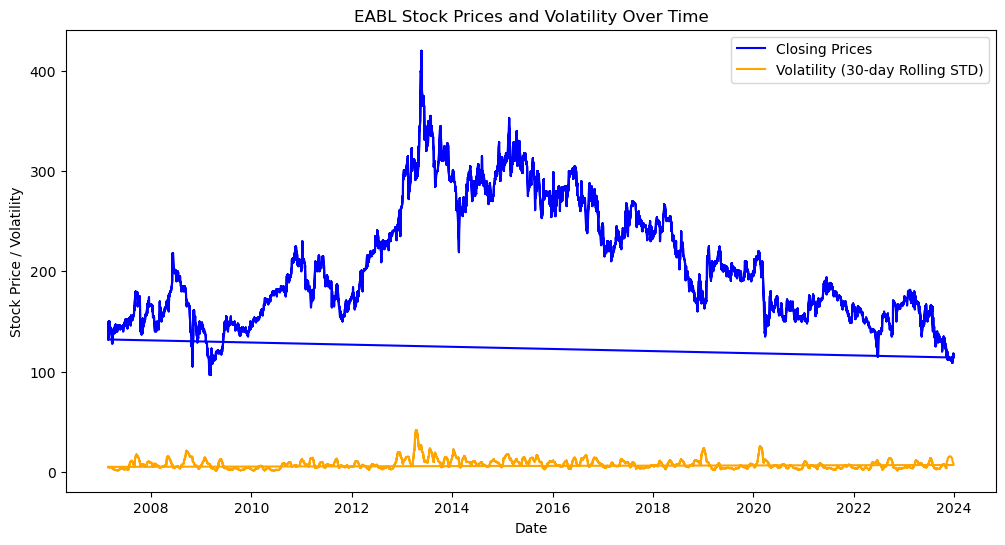

In [40]:
# Plotting daily closing prices
plt.figure(figsize=(12, 6))
plt.plot(merged_data['Date'], merged_data['Close'], label='Closing Prices', color='blue')

# Plotting rolling standard deviation for volatility
plt.plot(merged_data['Date'], merged_data['Close'].rolling(window=30).std(), label='Volatility (30-day Rolling STD)', color='orange')

plt.title('EABL Stock Prices and Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Price / Volatility')
plt.legend()
plt.show()

#### 2. ABNORMAL TRADE VOLUME ANALYSIS

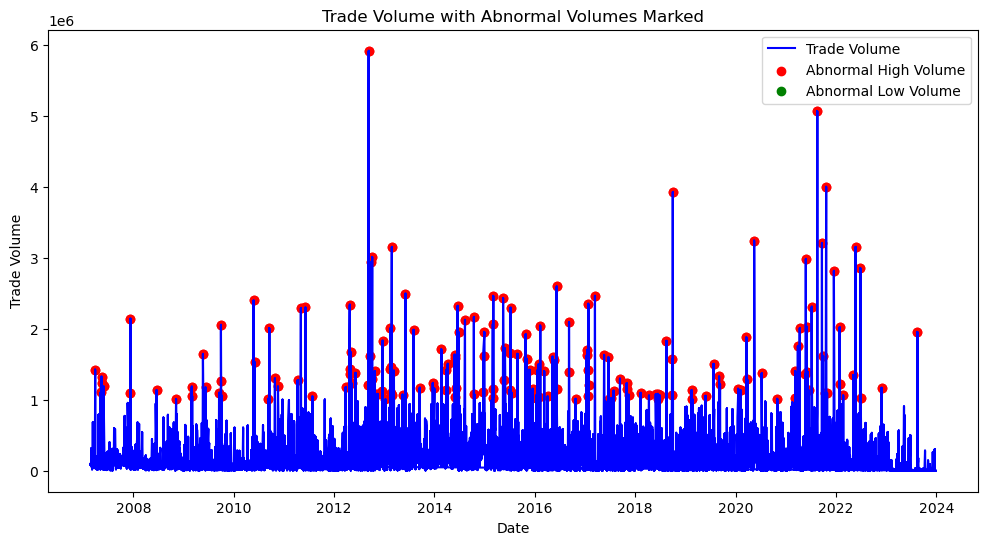

In [44]:
# Calculate mean and standard deviation of trade volume
mean_volume = merged_data['Volume'].mean()
std_volume = merged_data['Volume'].std()

# Plotting with markers for abnormal volumes
plt.figure(figsize=(12, 6))
plt.plot(merged_data['Date'], merged_data['Volume'], label='Trade Volume', color='blue')
plt.scatter(merged_data.loc[merged_data['Volume'] > mean_volume + 2 * std_volume, 'Date'],
            merged_data.loc[merged_data['Volume'] > mean_volume + 2 * std_volume, 'Volume'],
            color='red', label='Abnormal High Volume')
plt.scatter(merged_data.loc[merged_data['Volume'] < mean_volume - 2 * std_volume, 'Date'],
            merged_data.loc[merged_data['Volume'] < mean_volume - 2 * std_volume, 'Volume'],
            color='green', label='Abnormal Low Volume')
plt.title('Trade Volume with Abnormal Volumes Marked')
plt.xlabel('Date')
plt.ylabel('Trade Volume')
plt.legend()
plt.show()

In [46]:
# Dates with Abnormally High Trade Volume
high_volume_dates = merged_data[merged_data['Volume'] > merged_data['Volume'].mean() + 2 * merged_data['Volume'].std()].index
high_volume_dates

Int64Index([ 106,  282,  384,  388,  411,  423,  471,  488,  489,  517,
            ...
            8092, 8169, 8266, 8392, 8393, 8528, 8538, 8540, 8545, 8570],
           dtype='int64', length=350)

In [49]:
# Retrieve Additional Information for Identified Dates
high_volume_info = merged_data.loc[high_volume_dates, ['Date', 'Volume', 'Close', 'Mean']]

# Display the DataFrame
print(high_volume_info)

           Date   Volume   Close      Mean
106  2023-08-16  1955500  134.00  143.9088
282  2022-11-29  1169300  166.00  122.3765
384  2022-07-01  1022000  140.00  117.8735
388  2022-06-27  2854500  115.00  117.6941
411  2022-05-24  3153500  141.25  116.5176
...         ...      ...     ...       ...
8528 2007-05-31  1186700  145.00   66.9656
8538 2007-05-17  1234400  145.00   67.0722
8540 2007-05-15  1326400  145.00   67.0767
8545 2007-05-08  1102900  146.00   67.4422
8570 2007-03-29  1425300  135.00   68.6978

[350 rows x 4 columns]


The 'Date' column represents the specific dates when abnormal trade volumes occurred.

The 'Volume' column indicates the trading volume on those specific dates. Abnormally high volumes suggest increased market activity, potentially indicating significant events or news affecting the stock.

The 'Close' column represents the closing stock prices on the identified dates. Analyzing the closing prices in conjunction with high volumes provides insights into how stock prices reacted to increased trading activity.

The 'Mean' column represents the calculated mean values on those dates.
This is the mean stock price or another according to the context of our dataset.

The analysis of these dates with high volumes helps us to understand the catalysts behind the abnormal trading activity

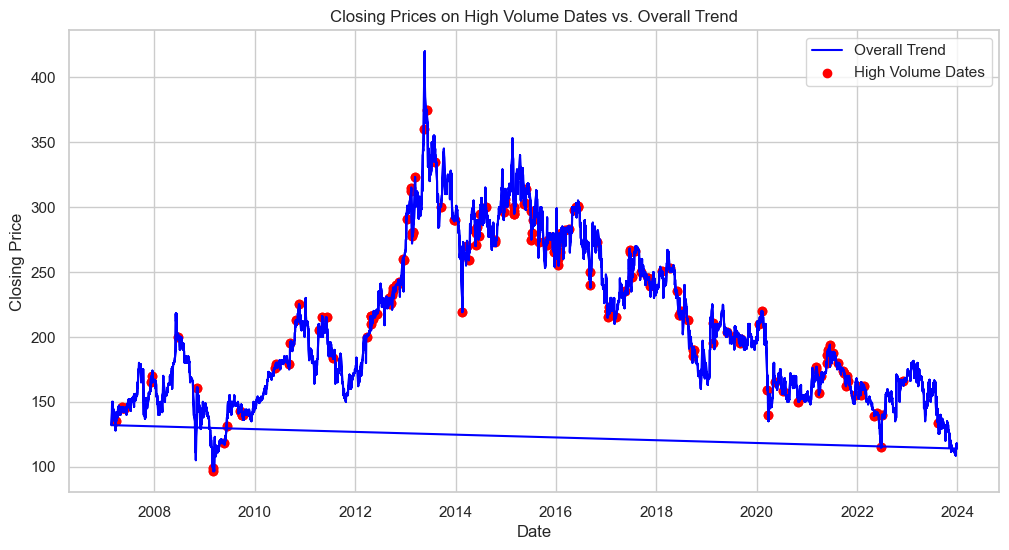

In [50]:
# Filter data for the identified dates with high volumes
high_volume_info_subset = high_volume_info[['Date', 'Close']]

# Set 'Date' as the index for plotting
high_volume_info_subset.set_index('Date', inplace=True)

# Plotting the closing prices on the identified dates
plt.figure(figsize=(12, 6))
plt.plot(merged_data['Date'], merged_data['Close'], label='Overall Trend', color='blue')
plt.scatter(high_volume_info_subset.index, high_volume_info_subset['Close'], label='High Volume Dates', color='red')
plt.title('Closing Prices on High Volume Dates vs. Overall Trend')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

Compare the stock's closing prices on the identified dates with the overall trend, representing instances of abnormally high trade volumes. The plot helps us to observe any abnormal price movements associated with the high volumes.
The pikes or drops in the red markers suggest abnormal trade volumes on those specific dates.
For dates with both high volumes and abnormal price movements, further investigation is needed to understand the catalysts or factors influencing these market activities. It could be related to significant news, events, or external factors impacting the stock.

#### 3. DIVIDEND ANALYSIS

In [52]:
plt.figure(figsize=(12, 6))
plt.fill_between(merged_data['Date'], merged_data['Dividends per share'].cumsum(), color='skyblue', alpha=0.4)
plt.title('Cumulative Dividends Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Dividends')
plt.grid(True)
plt.show()

KeyError: 'Dividends per share'

<Figure size 1200x600 with 0 Axes>

#### 4. TIME SERIES DECOMPOSITION

#### 5. Lagging Analysis

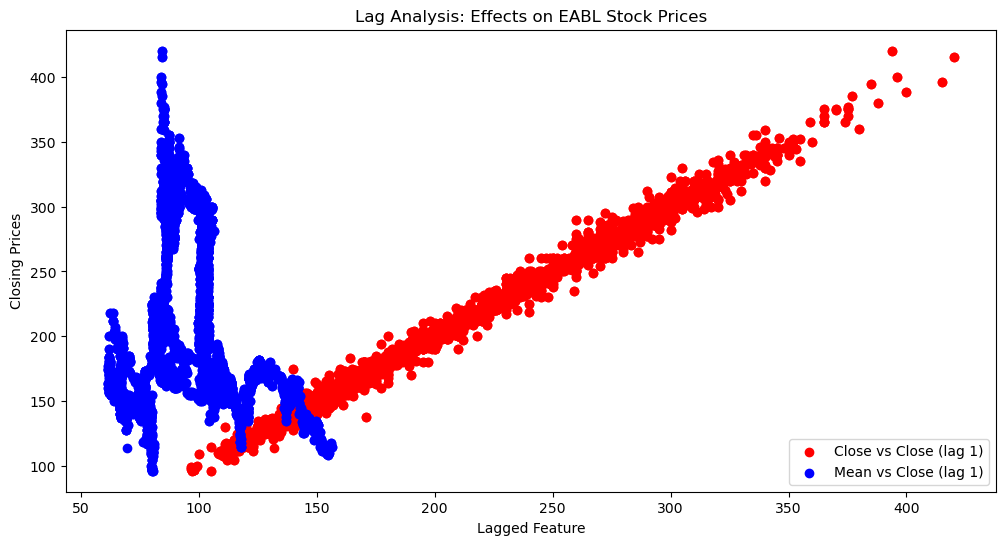

In [43]:
# Assuming 'Close_Lag_1' and 'Mean_Lag_1' columns are used for lag analysis
plt.figure(figsize=(12, 6))
plt.scatter(merged_data['Close_Lag_1'], merged_data['Close'], label='Close vs Close (lag 1)', color='red')
plt.scatter(merged_data['Mean_Lag_1'], merged_data['Close'], label='Mean vs Close (lag 1)', color='blue')

plt.title('Lag Analysis: Effects on EABL Stock Prices')
plt.xlabel('Lagged Feature')
plt.ylabel('Closing Prices')
plt.legend()
plt.show()

#### 7. STOCK VALUATION

In [ ]:
lag_period = 5  # Adjust the lag period as needed
plt.scatter(df['Daily_Return'].iloc[:-lag_period], df['Daily_Return'].shift(lag_period).dropna(), alpha=0.5)
plt.title(f'Time Lag Scatter Plot (Lag Period = {lag_period})')
plt.xlabel('Daily Returns (t - Lag Period)')
plt.ylabel(f'Daily Returns (t)')
plt.show()